In [1]:
# Dependencies
import tweepy
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target Search Term
twitter_handles = ["BBC", "CBS", "CNN", "FoxNews", "nytimes"]

# Create an empty list to store sentiments
sentiments = []

#Loop through each twitter handle
for twitter_handle in twitter_handles:
         
    # Keep track of tweet counts by recent tweet first
    counter = 1  

    # Loop through 5 pages (20 per page) = 100 tweets per handle
    for x in range(1, 6):

        news_tweets = api.user_timeline(twitter_handle, result_type="recent", page=x)

        # Loop through all tweets
        for tweet in news_tweets:   
            
            tweet_datetimes = []
            
            # Run Vader Analysis on each tweet
            vader_results = analyzer.polarity_scores(tweet["text"])
            compound = vader_results["compound"]
            pos = vader_results["pos"]
            neu = vader_results["neu"]
            neg = vader_results["neg"]
            tweet_datetimes.append(tweet["created_at"])
            
            #Convert raw time to a sortable time for chart
            for raw_time in tweet_datetimes:
                converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")

            #Add sentiments for each tweet into a dictionary
            #Append dictionary to list
            sentiments.append({"TwitterHandle": twitter_handle,
                               "Tweet": tweet["text"],
                               "Date": converted_time, 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "TweetsAgo": counter})

            # accumulate tweet number count for charts
            counter += 1

In [5]:
# Convert sentiments to DataFrame
# Reorder and then sort by Twitter handle and then by Date in descending order
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df = sentiments_df[["TwitterHandle", "Date", "TweetsAgo", "Compound", "Positive", "Negative", "Neutral", "Tweet"]]
sentiments_df.sort_values(["TwitterHandle", "Date"], ascending=[True, False])

,TwitterHandle,Date,TweetsAgo,Compound,Positive,Negative,Neutral,Tweet
0,BBC,2018-09-29 20:32:03+00:00,1,0.4215,0.257,0.743,0.000,Chile has launched a huge hiking route through...
1,BBC,2018-09-29 17:02:12+00:00,2,0.4215,0.135,0.865,0.000,🐣😍 Conservationists have been monitoring the p...
2,BBC,2018-09-29 16:01:07+00:00,3,-0.7003,0.000,0.707,0.293,'My children bought back the car I sold to pay...
3,BBC,2018-09-29 15:54:38+00:00,4,0.5499,0.129,0.871,0.000,RT @BBCEngland: Benny the beluga whale is spen...
4,BBC,2018-09-29 15:02:04+00:00,5,0.7088,0.329,0.671,0.000,Always start by playing paper! 👊✋✌️\n\nThis is...
5,BBC,2018-09-29 14:03:07+00:00,6,0.0000,0.000,1.000,0.000,'What do I know her from again?' 🤔📺\n\nThese a...
6,BBC,2018-09-29 13:01:07+00:00,7,-0.5256,0.000,0.747,0.253,This is the world's most dangerous city to be ...
7,BBC,2018-09-29 11:03:02+00:00,8,-0.1860,0.156,0.616,0.227,"""New York City is underwhelming"". 😳😳😳\n \n#Unp..."
8,BBC,2018-09-29 10:03:05+00:00,9,0.4939,0.181,0.819,0.000,What's it like growing up with tourettes?\n\nB...
9,BBC,2018-09-29 09:01:02+00:00,10,-0.5267,0.000,0.746,0.254,This school became a national leader by focusi...


In [6]:
# Save Sentiments dataframe as CSV to same folder
sentiments_df.to_csv("Distinguishing_Sentiments.csv", index=False, encoding='utf-8')

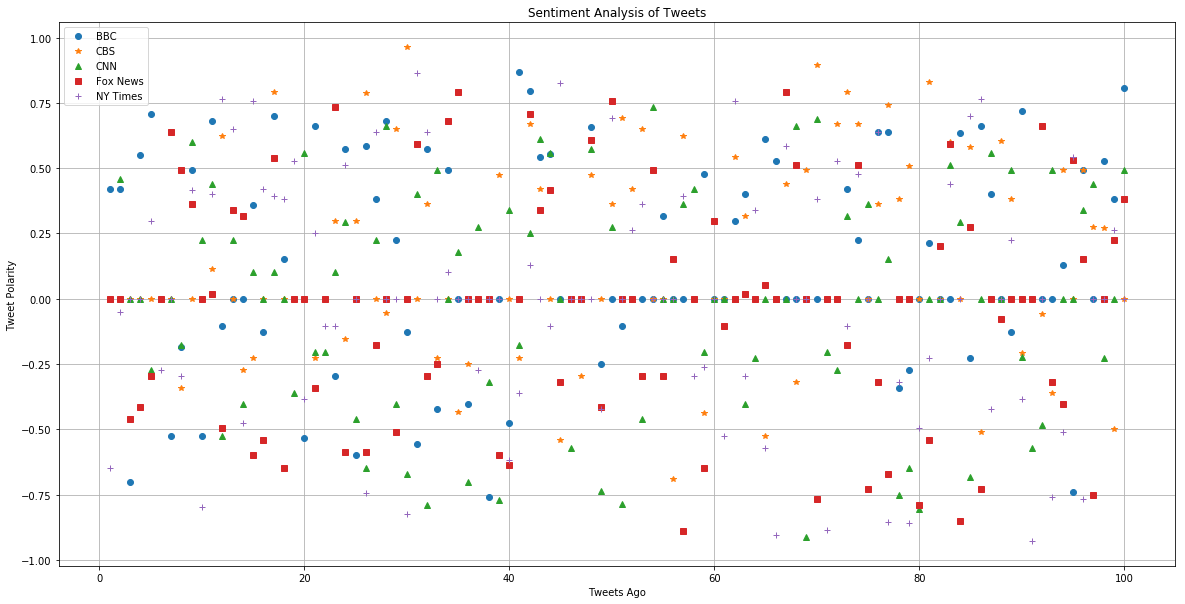

In [10]:
# Plot all sentiments by Twitter handle
fig, ax = plt.subplots()
sentiments_df[sentiments_df['TwitterHandle'] == 'BBC'].plot(x='TweetsAgo', 
                                                            y='Compound', 
                                                            ax=ax, 
                                                            grid=True,
                                                            marker="o",
                                                            linewidth=0,
                                                            figsize=(20,10),
                                                            label='BBC')
sentiments_df[sentiments_df['TwitterHandle'] == 'CBS'].plot(x='TweetsAgo', 
                                                            y='Compound', 
                                                            ax=ax, 
                                                            grid=True,
                                                            marker="*",
                                                            linewidth=0,
                                                            figsize=(20,10),
                                                            label='CBS')
sentiments_df[sentiments_df['TwitterHandle'] == 'CNN'].plot(x='TweetsAgo', 
                                                            y='Compound', 
                                                            ax=ax, 
                                                            grid=True,
                                                            marker="^",
                                                            linewidth=0,
                                                            figsize=(20,10),
                                                            label='CNN')
sentiments_df[sentiments_df['TwitterHandle'] == 'FoxNews'].plot(x='TweetsAgo', 
                                                                y='Compound', 
                                                                ax=ax, 
                                                                grid=True,
                                                                marker="s",
                                                                linewidth=0,
                                                                figsize=(20,10),
                                                                label='Fox News')
sentiments_df[sentiments_df['TwitterHandle'] == 'nytimes'].plot(x='TweetsAgo', 
                                                                y='Compound', 
                                                                ax=ax, 
                                                                grid=True,
                                                                marker="+",
                                                                linewidth=0,
                                                                figsize=(20,10),
                                                                label='NY Times')
ax.set_title("Sentiment Analysis of Tweets")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(loc="best")
plt.show()

# Save image to Image folder
fig.savefig('Images/AllSentiments.jpg')

In [8]:
# Prepare bar chart of average compound sentiment by Twitter handle
grouped_sentiments = sentiments_df.groupby(sentiments_df["TwitterHandle"]).mean()["Compound"]
grouped_sentiments.head()

TwitterHandle
BBC        0.132080
CBS        0.141713
CNN       -0.009721
FoxNews   -0.033378
nytimes    0.004759
Name: Compound, dtype: float64

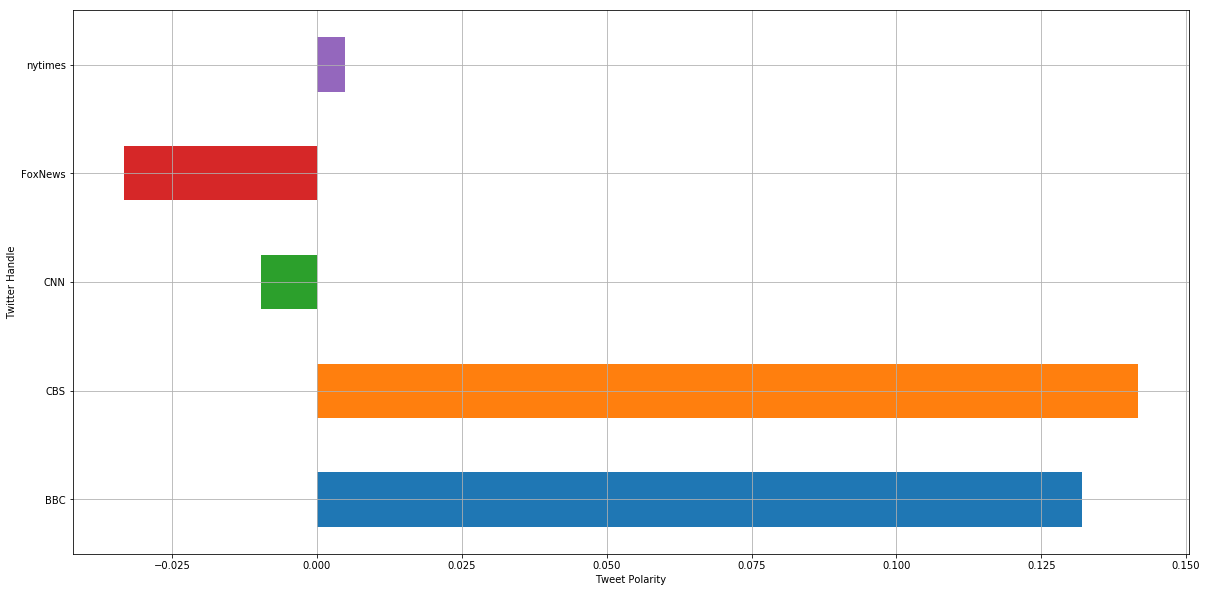

In [9]:
legends = ["BBC", "CBS", "CNN", "Fox News", "NY Times"]
grouped_sentiments.plot(kind="barh",
                       x="TwitterHandle", 
                       y='Compound', 
                       grid=True,
                       figsize=(20,10))

# Save image to Image folder
plt.ylabel("Twitter Handle")
plt.xlabel("Tweet Polarity")
plt.savefig('Images/AverageSentiments.jpg')